In [1]:
import pandas as pd
from pandas import MultiIndex, Int16Dtype
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [2]:
from platform import python_version
 
 
print("Current Python Version-", python_version())

Current Python Version- 3.8.6


In [3]:
import numpy
numpy.version.version

'1.23.5'

In [4]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.resample('h').mean()
CO_Data=CO_Data.dropna()
CO_Data.tail()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour
Date,,,,,,,,,
2020-04-30 19:00:00,242.060716,18.870796,71.072939,188.915151,91.471325,4.0,3.0,30.0,19.0
2020-04-30 20:00:00,218.655079,18.056864,75.132153,178.704750,84.176485,4.0,3.0,30.0,20.0
2020-04-30 21:00:00,194.147868,17.090891,81.315038,161.421792,73.858294,4.0,3.0,30.0,21.0
2020-04-30 22:00:00,206.432889,16.714085,82.568155,197.744043,83.279611,4.0,3.0,30.0,22.0
2020-04-30 23:00:00,173.577429,16.365121,83.662401,162.157636,68.669099,4.0,3.0,30.0,23.0


In [5]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [6]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('h').mean()
NO2_Data=NO2_Data.dropna()

In [7]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour,Ref_NO2
Date,,,,,,,,,,
2019-10-02 11:00:00,621.625704,26.378438,58.063437,46.094860,3.605625,10.0,2.0,2.0,11.0,15.230400
2019-10-02 12:00:00,725.154408,25.795055,48.256857,57.532808,13.865109,10.0,2.0,2.0,12.0,5.384051
2019-10-07 10:00:00,108.196313,32.344264,37.260757,47.259008,11.447809,10.0,0.0,7.0,10.0,4.255772
2019-10-07 11:00:00,135.822676,34.926112,35.013036,42.114260,10.075221,10.0,0.0,7.0,11.0,16.268034
2019-10-07 12:00:00,203.757758,36.201221,31.829282,45.701366,7.624153,10.0,0.0,7.0,12.0,12.770444


# CO DATA

In [8]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from flaml import AutoML
from sklearn.datasets import fetch_california_housing
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'

#train_test_split(X, y, test_size = 0.2)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [9]:
from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator

In [10]:
df1=[x for _, x in NO2_Data.groupby('Month')]
data_oct=df1[4]
#data_oct=data_oct.sample(frac=1)
data_nov=df1[5]
#data_nov=data_nov.sample(frac=1)
data_dec=df1[6]
#data_dec=data_dec.sample(frac=1)
data_jan=df1[0]
#data_jan=data_jan.sample(frac=1)
data_feb=df1[1]
#data_feb=data_feb.sample(frac=1)
data_mar=df1[2]
#data_mar=data_mar.sample(frac=1)
data_apr=df1[3]
#data_apr=data_apr.sample(frac=1)
data=[data_oct,data_nov,data_dec,data_jan,data_feb,data_mar]

In [11]:
data_Oct=data_oct.resample('60min').mean()
data_Oct=data_Oct.dropna()
data_Nov=data_nov.resample('60min').mean()
data_Nov=data_Nov.dropna()
data_Dec=data_dec.resample('60min').mean()
data_Dec=data_Dec.dropna()
data_Jan=data_jan.resample('60min').mean()
data_Jan=data_Jan.dropna()
data_Feb=data_feb.resample('60min').mean()
data_Feb=data_Feb.dropna()
data_Mar=data_mar.resample('60min').mean()
data_Mar=data_Mar.dropna()
data_Apr=data_apr.resample('60min').mean()
data_Apr=data_Apr.dropna()

In [12]:
co_data=NO2_Data
co_data=co_data.resample('60min').mean()
co_data=co_data.dropna()
X=co_data[['Net Signal','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]
y=co_data['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 500,  # in seconds
    "metric": 'rmse',
    "eval_method":'holdout',
    "task": 'regression',
    "log_file_name": "california.log",
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings,estimator_list=["rf"])#,estimator_list=["xgboost"]
pred=automl.predict(X_test)
rmse_r=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)

[flaml.automl: 12-19 16:07:33] {2599} INFO - task = regression
[flaml.automl: 12-19 16:07:33] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:07:33] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:07:33] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:07:33] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 12-19 16:07:33] {3166} INFO - iteration 0, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:34] {3296} INFO - Estimated sufficient time budget=1436s. Estimated necessary t

[flaml.automl: 12-19 16:07:36] {3166} INFO - iteration 12, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:36] {3343} INFO -  at 2.7s,	estimator rf's best error=3.2011,	best estimator rf's best error=3.2011
[flaml.automl: 12-19 16:07:36] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent wi

[flaml.automl: 12-19 16:07:54] {3343} INFO -  at 20.8s,	estimator rf's best error=2.9638,	best estimator rf's best error=2.9638
[flaml.automl: 12-19 16:07:54] {3166} INFO - iteration 25, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:56] {3343} INFO -  at 23.3s,	estimator rf's best error=2.9638,	best estimator rf's best error=2.9638
[flaml.automl: 12-19 16:07:56] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:08:15] {3343} INFO -  at 41.7s,	estimator rf's best error=2.9638,	best estimator rf's best error=2.9638
[flaml.automl: 12-19 16:08:15] {3166} INFO - iteration 38, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:15] {3343} INFO -  at 42.3s,	estimator rf's best error=2.9638,	best estimator rf's best error=2.9638
[flaml.automl: 12-19 16:08:15] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:08:33] {3343} INFO -  at 59.4s,	estimator rf's best error=2.9638,	best estimator rf's best error=2.9638
[flaml.automl: 12-19 16:08:33] {3166} INFO - iteration 51, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:34] {3343} INFO -  at 61.1s,	estimator rf's best error=2.9638,	best estimator rf's best error=2.9638
[flaml.automl: 12-19 16:08:34] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:08:50] {3343} INFO -  at 76.4s,	estimator rf's best error=2.9638,	best estimator rf's best error=2.9638
[flaml.automl: 12-19 16:08:50] {3166} INFO - iteration 64, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:51] {3343} INFO -  at 77.6s,	estimator rf's best error=2.9638,	best estimator rf's best error=2.9638
[flaml.automl: 12-19 16:08:51] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:09:07] {3343} INFO -  at 93.6s,	estimator rf's best error=2.9595,	best estimator rf's best error=2.9595
[flaml.automl: 12-19 16:09:07] {3166} INFO - iteration 77, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:08] {3343} INFO -  at 94.7s,	estimator rf's best error=2.9595,	best estimator rf's best error=2.9595
[flaml.automl: 12-19 16:09:08] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:09:27] {3343} INFO -  at 113.4s,	estimator rf's best error=2.9574,	best estimator rf's best error=2.9574
[flaml.automl: 12-19 16:09:27] {3166} INFO - iteration 90, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:28] {3343} INFO -  at 115.0s,	estimator rf's best error=2.9574,	best estimator rf's best error=2.9574
[flaml.automl: 12-19 16:09:28] {3166} INFO - iteration 91, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:09:45] {3343} INFO -  at 131.9s,	estimator rf's best error=2.9574,	best estimator rf's best error=2.9574
[flaml.automl: 12-19 16:09:45] {3166} INFO - iteration 103, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:47] {3343} INFO -  at 134.0s,	estimator rf's best error=2.9574,	best estimator rf's best error=2.9574
[flaml.automl: 12-19 16:09:47] {3166} INFO - iteration 104, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:10:05] {3343} INFO -  at 151.8s,	estimator rf's best error=2.9574,	best estimator rf's best error=2.9574
[flaml.automl: 12-19 16:10:05] {3166} INFO - iteration 116, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:10:07] {3343} INFO -  at 153.9s,	estimator rf's best error=2.9574,	best estimator rf's best error=2.9574
[flaml.automl: 12-19 16:10:07] {3166} INFO - iteration 117, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:10:32] {3343} INFO -  at 178.6s,	estimator rf's best error=2.9574,	best estimator rf's best error=2.9574
[flaml.automl: 12-19 16:10:32] {3166} INFO - iteration 129, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:10:35] {3343} INFO -  at 181.3s,	estimator rf's best error=2.9574,	best estimator rf's best error=2.9574
[flaml.automl: 12-19 16:10:35] {3166} INFO - iteration 130, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:10:56] {3343} INFO -  at 202.9s,	estimator rf's best error=2.9574,	best estimator rf's best error=2.9574
[flaml.automl: 12-19 16:10:56] {3166} INFO - iteration 142, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:10:58] {3343} INFO -  at 204.6s,	estimator rf's best error=2.9574,	best estimator rf's best error=2.9574
[flaml.automl: 12-19 16:10:58] {3166} INFO - iteration 143, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:11:15] {3343} INFO -  at 222.0s,	estimator rf's best error=2.9574,	best estimator rf's best error=2.9574
[flaml.automl: 12-19 16:11:15] {3166} INFO - iteration 155, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:11:17] {3343} INFO -  at 224.1s,	estimator rf's best error=2.9574,	best estimator rf's best error=2.9574
[flaml.automl: 12-19 16:11:17] {3166} INFO - iteration 156, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:11:49] {3343} INFO -  at 255.4s,	estimator rf's best error=2.9534,	best estimator rf's best error=2.9534
[flaml.automl: 12-19 16:11:49] {3166} INFO - iteration 168, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:11:51] {3343} INFO -  at 257.6s,	estimator rf's best error=2.9534,	best estimator rf's best error=2.9534
[flaml.automl: 12-19 16:11:51] {3166} INFO - iteration 169, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:12:23] {3343} INFO -  at 289.3s,	estimator rf's best error=2.9534,	best estimator rf's best error=2.9534
[flaml.automl: 12-19 16:12:23] {3166} INFO - iteration 181, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:12:25] {3343} INFO -  at 291.7s,	estimator rf's best error=2.9534,	best estimator rf's best error=2.9534
[flaml.automl: 12-19 16:12:25] {3166} INFO - iteration 182, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:12:58] {3343} INFO -  at 325.2s,	estimator rf's best error=2.9534,	best estimator rf's best error=2.9534
[flaml.automl: 12-19 16:12:58] {3166} INFO - iteration 194, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:13:00] {3343} INFO -  at 326.9s,	estimator rf's best error=2.9534,	best estimator rf's best error=2.9534
[flaml.automl: 12-19 16:13:00] {3166} INFO - iteration 195, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:13:30] {3343} INFO -  at 356.3s,	estimator rf's best error=2.9529,	best estimator rf's best error=2.9529
[flaml.automl: 12-19 16:13:30] {3166} INFO - iteration 207, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:13:32] {3343} INFO -  at 359.1s,	estimator rf's best error=2.9529,	best estimator rf's best error=2.9529
[flaml.automl: 12-19 16:13:32] {3166} INFO - iteration 208, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:14:00] {3343} INFO -  at 387.2s,	estimator rf's best error=2.9464,	best estimator rf's best error=2.9464
[flaml.automl: 12-19 16:14:00] {3166} INFO - iteration 220, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:14:03] {3343} INFO -  at 389.9s,	estimator rf's best error=2.9464,	best estimator rf's best error=2.9464
[flaml.automl: 12-19 16:14:03] {3166} INFO - iteration 221, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:14:27] {3343} INFO -  at 413.9s,	estimator rf's best error=2.9461,	best estimator rf's best error=2.9461
[flaml.automl: 12-19 16:14:27] {3166} INFO - iteration 233, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:14:29] {3343} INFO -  at 415.9s,	estimator rf's best error=2.9461,	best estimator rf's best error=2.9461
[flaml.automl: 12-19 16:14:29] {3166} INFO - iteration 234, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:14:47] {3343} INFO -  at 434.1s,	estimator rf's best error=2.9461,	best estimator rf's best error=2.9461
[flaml.automl: 12-19 16:14:47] {3166} INFO - iteration 246, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:14:49] {3343} INFO -  at 435.4s,	estimator rf's best error=2.9461,	best estimator rf's best error=2.9461
[flaml.automl: 12-19 16:14:49] {3166} INFO - iteration 247, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:15:07] {3343} INFO -  at 453.9s,	estimator rf's best error=2.9461,	best estimator rf's best error=2.9461
[flaml.automl: 12-19 16:15:07] {3166} INFO - iteration 259, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:09] {3343} INFO -  at 456.2s,	estimator rf's best error=2.9461,	best estimator rf's best error=2.9461
[flaml.automl: 12-19 16:15:09] {3166} INFO - iteration 260, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:15:29] {3343} INFO -  at 475.5s,	estimator rf's best error=2.9461,	best estimator rf's best error=2.9461
[flaml.automl: 12-19 16:15:29] {3166} INFO - iteration 272, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:29] {3343} INFO -  at 476.3s,	estimator rf's best error=2.9461,	best estimator rf's best error=2.9461
[flaml.automl: 12-19 16:15:29] {3166} INFO - iteration 273, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:15:49] {3343} INFO -  at 495.6s,	estimator rf's best error=2.9461,	best estimator rf's best error=2.9461
[flaml.automl: 12-19 16:15:49] {3166} INFO - iteration 285, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:50] {3343} INFO -  at 497.1s,	estimator rf's best error=2.9461,	best estimator rf's best error=2.9461
[flaml.automl: 12-19 16:15:50] {3166} INFO - iteration 286, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

In [13]:
from sklearn.neighbors import LocalOutlierFactor
A=['Net Signal','Temp','RH','Month','Day_of_week','Hour','Ref_O3']
B='Ref'
frame1=[data_Oct,data_Nov,data_Dec,data_Jan,data_Feb,data_Mar]#,data_feb
Train1=pd.concat(frame1)
train1=Train1.sample(frac=1)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(train1)
mask = yhat != -1
train1= train1[mask]
test1=data_Apr
yhat = lof.fit_predict(test1)
mask = yhat != -1
test1= test1[mask]

frame2=[data_Oct,data_Nov,data_Dec,data_Jan,data_Feb,data_Apr]#,data_feb
Train2=pd.concat(frame2)
train2=Train2.sample(frac=1)
yhat = lof.fit_predict(train2)
mask = yhat != -1
train2= train2[mask]
test2=data_Mar
yhat = lof.fit_predict(test2)
mask = yhat != -1
test2= test2[mask]

frame3=[data_Oct,data_Nov,data_Dec,data_Jan,data_Mar,data_Apr]#,data_feb
Train3=pd.concat(frame3)
train3=Train3.sample(frac=1)
yhat = lof.fit_predict(train3)
mask = yhat != -1
train3= train3[mask]
test3=data_Feb
yhat = lof.fit_predict(test3)
mask = yhat != -1
test3= test3[mask]

frame4=[data_Oct,data_Nov,data_Dec,data_Feb,data_Mar,data_Apr]#,data_feb
Train4=pd.concat(frame4)
train4=Train4.sample(frac=1)
yhat = lof.fit_predict(train4)
mask = yhat != -1
train4= train4[mask]
test4=data_Jan
yhat = lof.fit_predict(test4)
mask = yhat != -1
test4= test4[mask]

frame5=[data_Oct,data_Nov,data_Jan,data_Feb,data_Mar,data_Apr]#,data_feb
Train5=pd.concat(frame5)
train5=Train5.sample(frac=1)
yhat = lof.fit_predict(train5)
mask = yhat != -1
train5= train5[mask]
test5=data_Dec
yhat = lof.fit_predict(test5)
mask = yhat != -1
test5= test5[mask]

frame6=[data_Oct,data_Dec,data_Jan,data_Feb,data_Mar,data_Apr]#,data_feb
Train6=pd.concat(frame6)
train6=Train6.sample(frac=1)
yhat = lof.fit_predict(train6)
mask = yhat != -1
train6= train6[mask]
test6=data_Nov
yhat = lof.fit_predict(test6)
mask = yhat != -1
test6= test6[mask]

frame7=[data_Nov,data_Dec,data_Jan,data_Feb,data_Mar,data_Apr]#,data_feb
Train7=pd.concat(frame7)
train7=Train7.sample(frac=1)
yhat = lof.fit_predict(train7)
mask = yhat != -1
train7= train7[mask]
test7=data_Oct
yhat = lof.fit_predict(test7)
mask = yhat != -1
test7= test7[mask]


Train=[train1,train2,train3,train4,train5,train6,train7]
Test=[test1,test2,test3,test4,test5,test6,test7]

In [14]:
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 500,  # in seconds
    "metric": 'rmse',
    "eval_method":'holdout',
    "task": 'regression',
    "log_file_name": "california.log",
}

rmse=[]

# Train with labeled input data
for i in range(7):
    automl.fit(X_train=Train[i][A], y_train=Train[i][B],
           **automl_settings,estimator_list=["rf"])#,estimator_list=["xgboost"]
    pred=automl.predict(Test[i][A])
    R2=round(sm.r2_score(Test[i][B], pred), 2)
    r=round(np.corrcoef(Test[i][B], pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(Test[i][B], pred))/np.mean(Test[i][B]),2)
    rmse.append(RMSE)
    print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
#print(automl.model.estimator)

[flaml.automl: 12-19 16:15:58] {2599} INFO - task = regression
[flaml.automl: 12-19 16:15:58] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:15:58] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:15:58] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:15:59] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 12-19 16:15:59] {3166} INFO - iteration 0, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:59] {3296} INFO - Estimated sufficient time budget=1907s. Estimated necessary t

[flaml.automl: 12-19 16:16:01] {3166} INFO - iteration 12, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:02] {3343} INFO -  at 3.2s,	estimator rf's best error=3.4590,	best estimator rf's best error=3.4590
[flaml.automl: 12-19 16:16:02] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent wi

[flaml.automl: 12-19 16:16:34] {3343} INFO -  at 35.2s,	estimator rf's best error=3.1757,	best estimator rf's best error=3.1757
[flaml.automl: 12-19 16:16:34] {3166} INFO - iteration 25, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:42] {3343} INFO -  at 43.2s,	estimator rf's best error=3.1757,	best estimator rf's best error=3.1757
[flaml.automl: 12-19 16:16:42] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:18:02] {3343} INFO -  at 124.1s,	estimator rf's best error=3.1757,	best estimator rf's best error=3.1757
[flaml.automl: 12-19 16:18:02] {3166} INFO - iteration 38, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:18:07] {3343} INFO -  at 128.4s,	estimator rf's best error=3.1757,	best estimator rf's best error=3.1757
[flaml.automl: 12-19 16:18:07] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:19:37] {3343} INFO -  at 218.4s,	estimator rf's best error=3.1757,	best estimator rf's best error=3.1757
[flaml.automl: 12-19 16:19:37] {3166} INFO - iteration 51, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:19:46] {3343} INFO -  at 227.6s,	estimator rf's best error=3.1757,	best estimator rf's best error=3.1757
[flaml.automl: 12-19 16:19:46] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:20:59] {3343} INFO -  at 300.9s,	estimator rf's best error=3.1757,	best estimator rf's best error=3.1757
[flaml.automl: 12-19 16:20:59] {3166} INFO - iteration 64, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:21:05] {3343} INFO -  at 306.9s,	estimator rf's best error=3.1757,	best estimator rf's best error=3.1757
[flaml.automl: 12-19 16:21:05] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:22:28] {3343} INFO -  at 389.6s,	estimator rf's best error=3.1757,	best estimator rf's best error=3.1757
[flaml.automl: 12-19 16:22:28] {3166} INFO - iteration 77, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:22:34] {3343} INFO -  at 395.5s,	estimator rf's best error=3.1757,	best estimator rf's best error=3.1757
[flaml.automl: 12-19 16:22:34] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:23:54] {3343} INFO -  at 475.4s,	estimator rf's best error=3.1757,	best estimator rf's best error=3.1757
[flaml.automl: 12-19 16:23:54] {3166} INFO - iteration 90, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:24:00] {3343} INFO -  at 482.0s,	estimator rf's best error=3.1757,	best estimator rf's best error=3.1757
[flaml.automl: 12-19 16:24:00] {3166} INFO - iteration 91, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

0.74 0.21 0.79


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:24:22] {3296} INFO - Estimated sufficient time budget=3569s. Estimated necessary time budget=4s.
[flaml.automl: 12-19 16:24:22] {3343} INFO -  at 0.5s,	estimator rf's best error=7.2939,	best estimator rf's best error=7.2939
[flaml.automl: 12-19 16:24:22] {3166} INFO - iteration 1, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treate

[flaml.automl: 12-19 16:24:27] {3343} INFO -  at 4.8s,	estimator rf's best error=3.5519,	best estimator rf's best error=3.5519
[flaml.automl: 12-19 16:24:27] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:24:27] {3343} INFO -  at 5.8s,	estimator rf's best error=3.5496,	best estimator rf's best error=3.5496
[flaml.automl: 12-19 16:24:27] {3166} INFO - iteration 14, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]

[flaml.automl: 12-19 16:24:37] {3343} INFO -  at 15.1s,	estimator rf's best error=3.2848,	best estimator rf's best error=3.2848
[flaml.automl: 12-19 16:24:37] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:24:37] {3343} INFO -  at 15.6s,	estimator rf's best error=3.2848,	best estimator rf's best error=3.2848
[flaml.automl: 12-19 16:24:37] {3166} INFO - iteration 27, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:25:01] {3343} INFO -  at 39.3s,	estimator rf's best error=3.0864,	best estimator rf's best error=3.0864
[flaml.automl: 12-19 16:25:01] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:25:06] {3343} INFO -  at 44.2s,	estimator rf's best error=3.0864,	best estimator rf's best error=3.0864
[flaml.automl: 12-19 16:25:06] {3166} INFO - iteration 40, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:25:50] {3343} INFO -  at 88.2s,	estimator rf's best error=3.0864,	best estimator rf's best error=3.0864
[flaml.automl: 12-19 16:25:50] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:25:52] {3343} INFO -  at 90.3s,	estimator rf's best error=3.0864,	best estimator rf's best error=3.0864
[flaml.automl: 12-19 16:25:52] {3166} INFO - iteration 53, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:26:39] {3343} INFO -  at 137.0s,	estimator rf's best error=3.0864,	best estimator rf's best error=3.0864
[flaml.automl: 12-19 16:26:39] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:26:41] {3343} INFO -  at 138.9s,	estimator rf's best error=3.0864,	best estimator rf's best error=3.0864
[flaml.automl: 12-19 16:26:41] {3166} INFO - iteration 66, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:27:10] {3343} INFO -  at 168.1s,	estimator rf's best error=3.0644,	best estimator rf's best error=3.0644
[flaml.automl: 12-19 16:27:10] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:27:13] {3343} INFO -  at 170.9s,	estimator rf's best error=3.0496,	best estimator rf's best error=3.0496
[flaml.automl: 12-19 16:27:13] {3166} INFO - iteration 79, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:27:49] {3343} INFO -  at 206.9s,	estimator rf's best error=3.0496,	best estimator rf's best error=3.0496
[flaml.automl: 12-19 16:27:49] {3166} INFO - iteration 91, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:27:50] {3343} INFO -  at 208.7s,	estimator rf's best error=3.0496,	best estimator rf's best error=3.0496
[flaml.automl: 12-19 16:27:50] {3166} INFO - iteration 92, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:28:18] {3343} INFO -  at 236.5s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:28:18] {3166} INFO - iteration 104, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:28:19] {3343} INFO -  at 237.8s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:28:19] {3166} INFO - iteration 105, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:28:41] {3343} INFO -  at 259.7s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:28:41] {3166} INFO - iteration 117, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:28:42] {3343} INFO -  at 260.5s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:28:42] {3166} INFO - iteration 118, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:29:11] {3343} INFO -  at 289.7s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:29:11] {3166} INFO - iteration 130, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:29:13] {3343} INFO -  at 291.3s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:29:13] {3166} INFO - iteration 131, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:29:41] {3343} INFO -  at 319.3s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:29:41] {3166} INFO - iteration 143, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:29:43] {3343} INFO -  at 321.4s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:29:43] {3166} INFO - iteration 144, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:30:08] {3343} INFO -  at 346.5s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:30:08] {3166} INFO - iteration 156, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:30:09] {3343} INFO -  at 347.8s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:30:09] {3166} INFO - iteration 157, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:30:38] {3343} INFO -  at 376.3s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:30:38] {3166} INFO - iteration 169, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:30:40] {3343} INFO -  at 378.2s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:30:40] {3166} INFO - iteration 170, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:31:06] {3343} INFO -  at 404.1s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:31:06] {3166} INFO - iteration 182, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:31:09] {3343} INFO -  at 407.0s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:31:09] {3166} INFO - iteration 183, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:31:34] {3343} INFO -  at 431.9s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:31:34] {3166} INFO - iteration 195, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:31:36] {3343} INFO -  at 434.1s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:31:36] {3166} INFO - iteration 196, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:32:05] {3343} INFO -  at 463.0s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:32:05] {3166} INFO - iteration 208, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:32:06] {3343} INFO -  at 464.5s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:32:06] {3166} INFO - iteration 209, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:32:29] {3343} INFO -  at 487.5s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:32:29] {3166} INFO - iteration 221, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:32:31] {3343} INFO -  at 489.5s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:32:31] {3166} INFO - iteration 222, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

0.93 0.76 0.35


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:32:44] {3296} INFO - Estimated sufficient time budget=2766s. Estimated necessary time budget=3s.
[flaml.automl: 12-19 16:32:44] {3343} INFO -  at 0.4s,	estimator rf's best error=6.9526,	best estimator rf's best error=6.9526
[flaml.automl: 12-19 16:32:44] {3166} INFO - iteration 1, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treate

[flaml.automl: 12-19 16:32:49] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:32:50] {3343} INFO -  at 5.7s,	estimator rf's best error=3.2522,	best estimator rf's best error=3.2522
[flaml.automl: 12-19 16:32:50] {3166} INFO - iteration 14, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent wi

[flaml.automl: 12-19 16:34:03] {3343} INFO -  at 79.3s,	estimator rf's best error=3.1413,	best estimator rf's best error=3.1413
[flaml.automl: 12-19 16:34:03] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:34:06] {3343} INFO -  at 81.9s,	estimator rf's best error=3.1413,	best estimator rf's best error=3.1413
[flaml.automl: 12-19 16:34:06] {3166} INFO - iteration 27, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:35:59] {3343} INFO -  at 194.6s,	estimator rf's best error=3.1354,	best estimator rf's best error=3.1354
[flaml.automl: 12-19 16:35:59] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:36:10] {3343} INFO -  at 205.6s,	estimator rf's best error=3.1354,	best estimator rf's best error=3.1354
[flaml.automl: 12-19 16:36:10] {3166} INFO - iteration 40, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:37:38] {3343} INFO -  at 294.0s,	estimator rf's best error=3.1354,	best estimator rf's best error=3.1354
[flaml.automl: 12-19 16:37:38] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:37:43] {3343} INFO -  at 298.8s,	estimator rf's best error=3.1354,	best estimator rf's best error=3.1354
[flaml.automl: 12-19 16:37:43] {3166} INFO - iteration 53, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:39:12] {3343} INFO -  at 388.0s,	estimator rf's best error=3.1354,	best estimator rf's best error=3.1354
[flaml.automl: 12-19 16:39:12] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:39:16] {3343} INFO -  at 392.3s,	estimator rf's best error=3.1354,	best estimator rf's best error=3.1354
[flaml.automl: 12-19 16:39:16] {3166} INFO - iteration 66, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:40:44] {3343} INFO -  at 479.8s,	estimator rf's best error=3.1354,	best estimator rf's best error=3.1354
[flaml.automl: 12-19 16:40:44] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:40:49] {3343} INFO -  at 484.5s,	estimator rf's best error=3.1354,	best estimator rf's best error=3.1354
[flaml.automl: 12-19 16:40:49] {3166} INFO - iteration 79, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

0.94 0.87 0.19


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:13] {3296} INFO - Estimated sufficient time budget=1874s. Estimated necessary time budget=2s.
[flaml.automl: 12-19 16:41:13] {3343} INFO -  at 0.3s,	estimator rf's best error=6.7848,	best estimator rf's best error=6.7848
[flaml.automl: 12-19 16:41:13] {3166} INFO - iteration 1, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treate

[flaml.automl: 12-19 16:41:18] {3343} INFO -  at 4.7s,	estimator rf's best error=3.1768,	best estimator rf's best error=3.1768
[flaml.automl: 12-19 16:41:18] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:18] {3343} INFO -  at 5.4s,	estimator rf's best error=3.1768,	best estimator rf's best error=3.1768
[flaml.automl: 12-19 16:41:18] {3166} INFO - iteration 14, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]

[flaml.automl: 12-19 16:41:24] {3343} INFO -  at 11.3s,	estimator rf's best error=3.1768,	best estimator rf's best error=3.1768
[flaml.automl: 12-19 16:41:24] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:25] {3343} INFO -  at 11.9s,	estimator rf's best error=3.1768,	best estimator rf's best error=3.1768
[flaml.automl: 12-19 16:41:25] {3166} INFO - iteration 27, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:41:31] {3343} INFO -  at 18.3s,	estimator rf's best error=3.1768,	best estimator rf's best error=3.1768
[flaml.automl: 12-19 16:41:31] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:32] {3343} INFO -  at 18.8s,	estimator rf's best error=3.1768,	best estimator rf's best error=3.1768
[flaml.automl: 12-19 16:41:32] {3166} INFO - iteration 40, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:41:38] {3343} INFO -  at 24.5s,	estimator rf's best error=3.1768,	best estimator rf's best error=3.1768
[flaml.automl: 12-19 16:41:38] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:38] {3343} INFO -  at 25.0s,	estimator rf's best error=3.1768,	best estimator rf's best error=3.1768
[flaml.automl: 12-19 16:41:38] {3166} INFO - iteration 53, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:41:44] {3343} INFO -  at 31.1s,	estimator rf's best error=3.1768,	best estimator rf's best error=3.1768
[flaml.automl: 12-19 16:41:44] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:45] {3343} INFO -  at 31.5s,	estimator rf's best error=3.1768,	best estimator rf's best error=3.1768
[flaml.automl: 12-19 16:41:45] {3166} INFO - iteration 66, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:41:51] {3343} INFO -  at 37.5s,	estimator rf's best error=3.1768,	best estimator rf's best error=3.1768
[flaml.automl: 12-19 16:41:51] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:51] {3343} INFO -  at 37.9s,	estimator rf's best error=3.1768,	best estimator rf's best error=3.1768
[flaml.automl: 12-19 16:41:51] {3166} INFO - iteration 79, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:41:58] {3343} INFO -  at 44.6s,	estimator rf's best error=3.1427,	best estimator rf's best error=3.1427
[flaml.automl: 12-19 16:41:58] {3166} INFO - iteration 91, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:58] {3343} INFO -  at 45.1s,	estimator rf's best error=3.1427,	best estimator rf's best error=3.1427
[flaml.automl: 12-19 16:41:58] {3166} INFO - iteration 92, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:42:05] {3343} INFO -  at 51.7s,	estimator rf's best error=3.1427,	best estimator rf's best error=3.1427
[flaml.automl: 12-19 16:42:05] {3166} INFO - iteration 104, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:05] {3343} INFO -  at 52.3s,	estimator rf's best error=3.1427,	best estimator rf's best error=3.1427
[flaml.automl: 12-19 16:42:05] {3166} INFO - iteration 105, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:42:13] {3343} INFO -  at 59.5s,	estimator rf's best error=3.1328,	best estimator rf's best error=3.1328
[flaml.automl: 12-19 16:42:13] {3166} INFO - iteration 117, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:13] {3343} INFO -  at 60.1s,	estimator rf's best error=3.1328,	best estimator rf's best error=3.1328
[flaml.automl: 12-19 16:42:13] {3166} INFO - iteration 118, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:42:20] {3343} INFO -  at 67.1s,	estimator rf's best error=3.1328,	best estimator rf's best error=3.1328
[flaml.automl: 12-19 16:42:20] {3166} INFO - iteration 130, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:21] {3343} INFO -  at 68.0s,	estimator rf's best error=3.1328,	best estimator rf's best error=3.1328
[flaml.automl: 12-19 16:42:21] {3166} INFO - iteration 131, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:42:29] {3343} INFO -  at 75.7s,	estimator rf's best error=3.1328,	best estimator rf's best error=3.1328
[flaml.automl: 12-19 16:42:29] {3166} INFO - iteration 143, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:29] {3343} INFO -  at 76.2s,	estimator rf's best error=3.1328,	best estimator rf's best error=3.1328
[flaml.automl: 12-19 16:42:29] {3166} INFO - iteration 144, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:42:37] {3343} INFO -  at 84.0s,	estimator rf's best error=3.1103,	best estimator rf's best error=3.1103
[flaml.automl: 12-19 16:42:37] {3166} INFO - iteration 156, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:38] {3343} INFO -  at 84.5s,	estimator rf's best error=3.1103,	best estimator rf's best error=3.1103
[flaml.automl: 12-19 16:42:38] {3166} INFO - iteration 157, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:42:44] {3343} INFO -  at 90.7s,	estimator rf's best error=3.0940,	best estimator rf's best error=3.0940
[flaml.automl: 12-19 16:42:44] {3166} INFO - iteration 169, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:44] {3343} INFO -  at 91.2s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:42:44] {3166} INFO - iteration 170, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:42:50] {3343} INFO -  at 97.1s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:42:50] {3166} INFO - iteration 182, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:51] {3343} INFO -  at 97.6s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:42:51] {3166} INFO - iteration 183, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:42:58] {3343} INFO -  at 104.8s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:42:58] {3166} INFO - iteration 195, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:58] {3343} INFO -  at 105.3s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:42:58] {3166} INFO - iteration 196, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:43:06] {3343} INFO -  at 113.1s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:06] {3166} INFO - iteration 208, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:43:07] {3343} INFO -  at 113.7s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:07] {3166} INFO - iteration 209, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:43:13] {3343} INFO -  at 120.4s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:13] {3166} INFO - iteration 221, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:43:14] {3343} INFO -  at 120.9s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:14] {3166} INFO - iteration 222, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:43:20] {3343} INFO -  at 127.1s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:20] {3166} INFO - iteration 234, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:43:21] {3343} INFO -  at 127.8s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:21] {3166} INFO - iteration 235, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:43:29] {3343} INFO -  at 135.6s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:29] {3166} INFO - iteration 247, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:43:29] {3343} INFO -  at 136.2s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:29] {3166} INFO - iteration 248, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:43:36] {3343} INFO -  at 143.3s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:36] {3166} INFO - iteration 260, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:43:37] {3343} INFO -  at 143.9s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:37] {3166} INFO - iteration 261, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:43:44] {3343} INFO -  at 150.7s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:44] {3166} INFO - iteration 273, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:43:44] {3343} INFO -  at 151.2s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:44] {3166} INFO - iteration 274, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:43:51] {3343} INFO -  at 157.7s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:51] {3166} INFO - iteration 286, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:43:51] {3343} INFO -  at 158.1s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:51] {3166} INFO - iteration 287, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:43:57] {3343} INFO -  at 164.1s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:57] {3166} INFO - iteration 299, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:43:58] {3343} INFO -  at 164.6s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:58] {3166} INFO - iteration 300, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:44:05] {3343} INFO -  at 172.4s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:06] {3166} INFO - iteration 312, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:44:06] {3343} INFO -  at 173.0s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:06] {3166} INFO - iteration 313, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:44:13] {3343} INFO -  at 179.9s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:13] {3166} INFO - iteration 325, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:44:14] {3343} INFO -  at 180.4s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:14] {3166} INFO - iteration 326, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:44:20] {3343} INFO -  at 186.6s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:20] {3166} INFO - iteration 338, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:44:20] {3343} INFO -  at 187.1s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:20] {3166} INFO - iteration 339, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:44:26] {3343} INFO -  at 192.9s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:26] {3166} INFO - iteration 351, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:44:26] {3343} INFO -  at 193.4s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:27] {3166} INFO - iteration 352, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:44:33] {3343} INFO -  at 199.4s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:33] {3166} INFO - iteration 364, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:44:33] {3343} INFO -  at 200.1s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:33] {3166} INFO - iteration 365, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:44:40] {3343} INFO -  at 207.0s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:40] {3166} INFO - iteration 377, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:44:41] {3343} INFO -  at 207.7s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:41] {3166} INFO - iteration 378, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:44:48] {3343} INFO -  at 214.9s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:48] {3166} INFO - iteration 390, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:44:48] {3343} INFO -  at 215.4s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:48] {3166} INFO - iteration 391, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:44:55] {3343} INFO -  at 222.4s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:56] {3166} INFO - iteration 403, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:44:56] {3343} INFO -  at 222.9s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:56] {3166} INFO - iteration 404, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:45:03] {3343} INFO -  at 229.4s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:45:03] {3166} INFO - iteration 416, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:45:03] {3343} INFO -  at 229.9s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:45:03] {3166} INFO - iteration 417, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:45:09] {3343} INFO -  at 235.5s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:45:09] {3166} INFO - iteration 429, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:45:09] {3343} INFO -  at 236.0s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:45:09] {3166} INFO - iteration 430, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:45:15] {3343} INFO -  at 242.4s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:45:15] {3166} INFO - iteration 442, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:45:16] {3343} INFO -  at 242.8s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:45:16] {3166} INFO - iteration 443, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:45:22] {3343} INFO -  at 248.9s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:45:22] {3166} INFO - iteration 455, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:45:22] {3343} INFO -  at 249.3s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:45:22] {3166} INFO - iteration 456, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:45:28] {3343} INFO -  at 254.9s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:45:28] {3166} INFO - iteration 468, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:45:29] {3343} INFO -  at 255.5s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:45:29] {3166} INFO - iteration 469, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:45:34] {3343} INFO -  at 261.1s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:45:34] {3166} INFO - iteration 481, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:45:35] {3343} INFO -  at 261.6s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:45:35] {3166} INFO - iteration 482, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:45:40] {3343} INFO -  at 267.2s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:45:40] {3166} INFO - iteration 494, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:45:41] {3343} INFO -  at 267.7s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:45:41] {3166} INFO - iteration 495, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:45:47] {3343} INFO -  at 273.6s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:45:47] {3166} INFO - iteration 507, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:45:47] {3343} INFO -  at 274.1s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:45:47] {3166} INFO - iteration 508, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:45:54] {3343} INFO -  at 280.5s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:45:54] {3166} INFO - iteration 520, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:45:54] {3343} INFO -  at 281.0s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:45:54] {3166} INFO - iteration 521, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:46:00] {3343} INFO -  at 286.9s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:00] {3166} INFO - iteration 533, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:46:00] {3343} INFO -  at 287.4s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:00] {3166} INFO - iteration 534, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:46:07] {3343} INFO -  at 293.7s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:07] {3166} INFO - iteration 546, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:46:07] {3343} INFO -  at 294.2s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:07] {3166} INFO - iteration 547, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:46:13] {3343} INFO -  at 299.5s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:13] {3166} INFO - iteration 559, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:46:13] {3343} INFO -  at 300.0s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:13] {3166} INFO - iteration 560, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:46:21] {3343} INFO -  at 307.4s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:21] {3166} INFO - iteration 572, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:46:21] {3343} INFO -  at 307.9s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:21] {3166} INFO - iteration 573, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:46:28] {3343} INFO -  at 314.5s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:28] {3166} INFO - iteration 585, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:46:28] {3343} INFO -  at 315.0s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:28] {3166} INFO - iteration 586, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:46:34] {3343} INFO -  at 321.2s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:34] {3166} INFO - iteration 598, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:46:35] {3343} INFO -  at 321.7s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:35] {3166} INFO - iteration 599, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:46:41] {3343} INFO -  at 327.9s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:41] {3166} INFO - iteration 611, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:46:42] {3343} INFO -  at 328.4s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:42] {3166} INFO - iteration 612, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:46:47] {3343} INFO -  at 334.3s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:47] {3166} INFO - iteration 624, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:46:48] {3343} INFO -  at 334.9s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:48] {3166} INFO - iteration 625, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:46:54] {3343} INFO -  at 340.6s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:54] {3166} INFO - iteration 637, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:46:54] {3343} INFO -  at 341.0s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:54] {3166} INFO - iteration 638, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:47:00] {3343} INFO -  at 346.5s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:47:00] {3166} INFO - iteration 650, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:47:00] {3343} INFO -  at 347.0s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:47:00] {3166} INFO - iteration 651, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:47:06] {3343} INFO -  at 352.7s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:47:06] {3166} INFO - iteration 663, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:47:06] {3343} INFO -  at 353.2s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:47:06] {3166} INFO - iteration 664, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:47:13] {3343} INFO -  at 360.0s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:47:13] {3166} INFO - iteration 676, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:47:14] {3343} INFO -  at 360.6s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:47:14] {3166} INFO - iteration 677, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:47:21] {3343} INFO -  at 367.5s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:47:21] {3166} INFO - iteration 689, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:47:21] {3343} INFO -  at 368.0s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:47:21] {3166} INFO - iteration 690, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:47:27] {3343} INFO -  at 374.0s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:47:27] {3166} INFO - iteration 702, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:47:28] {3343} INFO -  at 374.6s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:47:28] {3166} INFO - iteration 703, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:47:34] {3343} INFO -  at 381.0s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:47:34] {3166} INFO - iteration 715, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:47:35] {3343} INFO -  at 381.6s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:47:35] {3166} INFO - iteration 716, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:47:41] {3343} INFO -  at 387.7s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:47:41] {3166} INFO - iteration 728, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:47:41] {3343} INFO -  at 388.4s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:47:42] {3166} INFO - iteration 729, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:47:49] {3343} INFO -  at 395.4s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:47:49] {3166} INFO - iteration 741, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:47:49] {3343} INFO -  at 396.0s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:47:49] {3166} INFO - iteration 742, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:47:55] {3343} INFO -  at 402.0s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:47:55] {3166} INFO - iteration 754, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:47:56] {3343} INFO -  at 402.5s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:47:56] {3166} INFO - iteration 755, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:48:02] {3343} INFO -  at 408.5s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:02] {3166} INFO - iteration 767, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:48:02] {3343} INFO -  at 409.0s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:02] {3166} INFO - iteration 768, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:48:09] {3343} INFO -  at 415.6s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:09] {3166} INFO - iteration 780, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:48:09] {3343} INFO -  at 416.1s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:09] {3166} INFO - iteration 781, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:48:15] {3343} INFO -  at 422.4s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:15] {3166} INFO - iteration 793, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:48:16] {3343} INFO -  at 423.1s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:16] {3166} INFO - iteration 794, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:48:23] {3343} INFO -  at 429.5s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:23] {3166} INFO - iteration 806, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:48:23] {3343} INFO -  at 430.1s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:23] {3166} INFO - iteration 807, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:48:30] {3343} INFO -  at 437.2s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:30] {3166} INFO - iteration 819, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:48:31] {3343} INFO -  at 437.7s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:31] {3166} INFO - iteration 820, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:48:37] {3343} INFO -  at 443.9s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:37] {3166} INFO - iteration 832, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:48:38] {3343} INFO -  at 444.4s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:38] {3166} INFO - iteration 833, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:48:44] {3343} INFO -  at 450.9s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:44] {3166} INFO - iteration 845, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:48:45] {3343} INFO -  at 451.4s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:45] {3166} INFO - iteration 846, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:48:50] {3343} INFO -  at 457.3s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:50] {3166} INFO - iteration 858, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:48:51] {3343} INFO -  at 457.8s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:51] {3166} INFO - iteration 859, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:48:57] {3343} INFO -  at 463.9s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:57] {3166} INFO - iteration 871, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:48:58] {3343} INFO -  at 464.5s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:58] {3166} INFO - iteration 872, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:49:04] {3343} INFO -  at 471.1s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:49:04] {3166} INFO - iteration 884, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:05] {3343} INFO -  at 471.6s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:49:05] {3166} INFO - iteration 885, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:49:11] {3343} INFO -  at 478.2s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:49:11] {3166} INFO - iteration 897, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:12] {3343} INFO -  at 478.8s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:49:12] {3166} INFO - iteration 898, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:49:18] {3343} INFO -  at 485.0s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:49:18] {3166} INFO - iteration 910, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:19] {3343} INFO -  at 485.5s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:49:19] {3166} INFO - iteration 911, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:49:25] {3343} INFO -  at 491.6s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:49:25] {3166} INFO - iteration 923, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:25] {3343} INFO -  at 492.2s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:49:25] {3166} INFO - iteration 924, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:49:32] {3343} INFO -  at 498.6s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:49:32] {3166} INFO - iteration 936, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:32] {3343} INFO -  at 499.1s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:49:32] {3166} INFO - iteration 937, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

0.93 0.85 0.2


[flaml.automl: 12-19 16:49:34] {2599} INFO - task = regression
[flaml.automl: 12-19 16:49:34] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:49:34] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:49:34] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:49:34] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 12-19 16:49:34] {3166} INFO - iteration 0, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:34] {3296} INFO - Estimated sufficient time budget=3790s. Estimated necessary t

[flaml.automl: 12-19 16:49:38] {3166} INFO - iteration 12, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:39] {3343} INFO -  at 5.3s,	estimator rf's best error=3.7207,	best estimator rf's best error=3.7207
[flaml.automl: 12-19 16:49:39] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent wi

[flaml.automl: 12-19 16:50:20] {3343} INFO -  at 46.6s,	estimator rf's best error=3.2590,	best estimator rf's best error=3.2590
[flaml.automl: 12-19 16:50:20] {3166} INFO - iteration 25, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:50:23] {3343} INFO -  at 49.7s,	estimator rf's best error=3.2590,	best estimator rf's best error=3.2590
[flaml.automl: 12-19 16:50:23] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:51:48] {3343} INFO -  at 134.5s,	estimator rf's best error=3.2392,	best estimator rf's best error=3.2392
[flaml.automl: 12-19 16:51:48] {3166} INFO - iteration 38, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:51:58] {3343} INFO -  at 144.7s,	estimator rf's best error=3.2392,	best estimator rf's best error=3.2392
[flaml.automl: 12-19 16:51:58] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:53:15] {3343} INFO -  at 221.7s,	estimator rf's best error=3.2213,	best estimator rf's best error=3.2213
[flaml.automl: 12-19 16:53:15] {3166} INFO - iteration 51, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:53:17] {3343} INFO -  at 223.9s,	estimator rf's best error=3.2213,	best estimator rf's best error=3.2213
[flaml.automl: 12-19 16:53:17] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:55:21] {3343} INFO -  at 347.2s,	estimator rf's best error=3.2177,	best estimator rf's best error=3.2177
[flaml.automl: 12-19 16:55:21] {3166} INFO - iteration 64, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:55:30] {3343} INFO -  at 356.4s,	estimator rf's best error=3.2177,	best estimator rf's best error=3.2177
[flaml.automl: 12-19 16:55:30] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:57:22] {3343} INFO -  at 468.3s,	estimator rf's best error=3.2177,	best estimator rf's best error=3.2177
[flaml.automl: 12-19 16:57:22] {3166} INFO - iteration 77, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:57:30] {3343} INFO -  at 476.5s,	estimator rf's best error=3.2177,	best estimator rf's best error=3.2177
[flaml.automl: 12-19 16:57:30] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

0.94 0.86 0.17


[flaml.automl: 12-19 16:57:56] {2599} INFO - task = regression
[flaml.automl: 12-19 16:57:56] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:57:56] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:57:56] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:57:56] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 12-19 16:57:56] {3166} INFO - iteration 0, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:57:57] {3296} INFO - Estimated sufficient time budget=3124s. Estimated necessary t

[flaml.automl: 12-19 16:58:01] {3166} INFO - iteration 12, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:58:02] {3343} INFO -  at 6.4s,	estimator rf's best error=3.2063,	best estimator rf's best error=3.2063
[flaml.automl: 12-19 16:58:02] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent wi

[flaml.automl: 12-19 16:58:38] {3343} INFO -  at 42.1s,	estimator rf's best error=2.9646,	best estimator rf's best error=2.9646
[flaml.automl: 12-19 16:58:38] {3166} INFO - iteration 25, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:58:40] {3343} INFO -  at 43.7s,	estimator rf's best error=2.9646,	best estimator rf's best error=2.9646
[flaml.automl: 12-19 16:58:40] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:59:23] {3343} INFO -  at 87.5s,	estimator rf's best error=2.9461,	best estimator rf's best error=2.9461
[flaml.automl: 12-19 16:59:23] {3166} INFO - iteration 38, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:59:32] {3343} INFO -  at 96.4s,	estimator rf's best error=2.9461,	best estimator rf's best error=2.9461
[flaml.automl: 12-19 16:59:32] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 17:00:33] {3343} INFO -  at 156.8s,	estimator rf's best error=2.9459,	best estimator rf's best error=2.9459
[flaml.automl: 12-19 17:00:33] {3166} INFO - iteration 51, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:00:35] {3343} INFO -  at 159.7s,	estimator rf's best error=2.9459,	best estimator rf's best error=2.9459
[flaml.automl: 12-19 17:00:35] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 17:01:36] {3343} INFO -  at 220.7s,	estimator rf's best error=2.9397,	best estimator rf's best error=2.9397
[flaml.automl: 12-19 17:01:36] {3166} INFO - iteration 64, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:01:42] {3343} INFO -  at 226.0s,	estimator rf's best error=2.9397,	best estimator rf's best error=2.9397
[flaml.automl: 12-19 17:01:42] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 17:03:16] {3343} INFO -  at 320.1s,	estimator rf's best error=2.9397,	best estimator rf's best error=2.9397
[flaml.automl: 12-19 17:03:16] {3166} INFO - iteration 77, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:03:26] {3343} INFO -  at 330.1s,	estimator rf's best error=2.9397,	best estimator rf's best error=2.9397
[flaml.automl: 12-19 17:03:26] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 17:04:58] {3343} INFO -  at 422.7s,	estimator rf's best error=2.9397,	best estimator rf's best error=2.9397
[flaml.automl: 12-19 17:04:58] {3166} INFO - iteration 90, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:05:06] {3343} INFO -  at 430.0s,	estimator rf's best error=2.9397,	best estimator rf's best error=2.9397
[flaml.automl: 12-19 17:05:06] {3166} INFO - iteration 91, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

0.94 0.86 0.2


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:06:18] {3296} INFO - Estimated sufficient time budget=1907s. Estimated necessary time budget=2s.
[flaml.automl: 12-19 17:06:18] {3343} INFO -  at 0.4s,	estimator rf's best error=6.8760,	best estimator rf's best error=6.8760
[flaml.automl: 12-19 17:06:18] {3166} INFO - iteration 1, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treate

[flaml.automl: 12-19 17:06:22] {3343} INFO -  at 5.1s,	estimator rf's best error=3.4903,	best estimator rf's best error=3.4903
[flaml.automl: 12-19 17:06:22] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:06:23] {3343} INFO -  at 5.7s,	estimator rf's best error=3.3152,	best estimator rf's best error=3.3152
[flaml.automl: 12-19 17:06:23] {3166} INFO - iteration 14, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]

[flaml.automl: 12-19 17:06:50] {3343} INFO -  at 33.1s,	estimator rf's best error=3.2497,	best estimator rf's best error=3.2497
[flaml.automl: 12-19 17:06:50] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:06:59] {3343} INFO -  at 41.3s,	estimator rf's best error=3.2497,	best estimator rf's best error=3.2497
[flaml.automl: 12-19 17:06:59] {3166} INFO - iteration 27, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 17:08:32] {3343} INFO -  at 134.8s,	estimator rf's best error=3.2167,	best estimator rf's best error=3.2167
[flaml.automl: 12-19 17:08:32] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:09:03] {3343} INFO -  at 165.9s,	estimator rf's best error=3.2167,	best estimator rf's best error=3.2167
[flaml.automl: 12-19 17:09:03] {3166} INFO - iteration 40, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 17:12:54] {3343} INFO -  at 396.2s,	estimator rf's best error=3.2167,	best estimator rf's best error=3.2167
[flaml.automl: 12-19 17:12:54] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:12:59] {3343} INFO -  at 401.5s,	estimator rf's best error=3.2167,	best estimator rf's best error=3.2167
[flaml.automl: 12-19 17:12:59] {3166} INFO - iteration 53, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

0.9 0.78 0.26


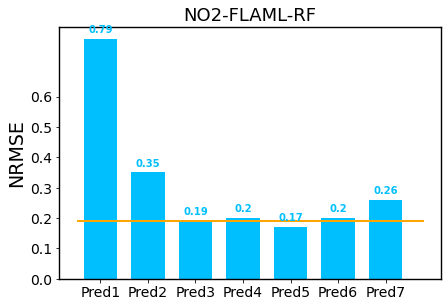

In [15]:
import matplotlib.pyplot as plt
import numpy as np
fig= plt.figure(figsize=(5.3,3.5))
ax = fig.add_axes([0,0,1,1])
x= ['Pred1', 'Pred2', 'Pred3','Pred4','Pred5','Pred6','Pred7']
students1=rmse
students2= [48,32,22,18,16]
plt.hlines([rmse_r], -0.5, 6.8, color='orange', linewidth=2)
x = np.arange(7)
wid= 0.7
graph1=ax.bar(x,students1,wid, color='#00BFFF', alpha=1)
#graph2=ax.bar(x+0.2,students2,wid, color='#00BFFF', alpha=1)
#plt.legend(['15min','60min'],title='Data resolution')
i= 0
for p in graph1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height+0.02,
             str(students1[i]),
             ha='center',
             weight='bold',fontsize=10, color='#00BFFF', alpha=1)
    i+=1

ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(['Pred1', 'Pred2', 'Pred3','Pred4','Pred5','Pred6','Pred7'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(np.arange(0,0.7, step=0.1))

#plt.xlabel('Tolerance,Tc (%)', fontsize=19)
plt.ylabel('NRMSE', fontsize=19)
plt.setp(ax.spines.values(), linewidth=1.4)
plt.title("NO2-FLAML-RF",fontsize=18)
plt.savefig("Pred_NO2_FLAML_RF.pdf", format="pdf", bbox_inches="tight")
plt.show()

X=CO_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_Data['Ref']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2,shuffle=True)

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 1440,  # in seconds
    "metric": 'rmse',
    "eval_method":'holdout',
    "task": 'regression',
    "log_file_name": "california.log",
}

Pred=[]
rmse=[]
model=[]
RS=[]
R=[]
for i in range(10):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["rf"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    #print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    #print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)
    RS.append(R2)
    R.append(r)

print(np.round(np.mean(R),2),np.round(np.mean(RS),2),np.round(np.mean(rmse),2))

In [16]:
print(np.round(np.mean(R),2),np.round(np.mean(RS),2),np.round(np.mean(rmse),2))

NameError: name 'R' is not defined

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["xgboost"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-XGBoost',fontsize=16)
plt.savefig("co_xgboost.pdf", format="pdf", bbox_inches="tight")

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["xgb_limitdepth"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-CO-LDXGBooost',fontsize=16)
plt.savefig("co_ldxgboost.pdf", format="pdf", bbox_inches="tight")

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-LDXGBooost',fontsize=16)
plt.savefig("co_ldxgboost.pdf", format="pdf", bbox_inches="tight")

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["extra_tree"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-Extra Tree',fontsize=16)
plt.savefig("co_extra_tree.pdf", format="pdf", bbox_inches="tight")

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

from flaml.model import SKLearnEstimator

from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator
import numpy as np

class RandomForestRegressor(SKLearnEstimator):
    def __init__(self, task="binary", **config):
        super().__init__(task, **config)

        if task in CLASSIFICATION:
            from sklearn.ensemble import RandomForestClassifier

            self.estimator_class =RandomForestClassifier 
        else:
            from sklearn.ensemble import RandomForestRegressor

            self.estimator_class =RandomForestRegressor

    @classmethod
    def search_space(cls, data_size, task):
        space = {
            "n_estimators": {
                "domain": {"domain": tune.loguniform(lower=100, upper=20000)},
                "low_cost_init_value": 100,
            },
            "max_features": {
                "domain": tune.loguniform(lower=0.1, upper=1),
                "low_cost_init_value": 0.1,
            },
            "max_leaf_nodes": {
                "domain": tune.lograndint(lower=100, upper=2500),
                "low_cost_init_value": 100,},
            "min_samples_split": {"domain": tune.lograndint(lower=1, upper=20),
            "init_value": 20,},
            
            "min_samples_leaf": {
                "domain": tune.lograndint(lower=1, upper=20),
                "init_value": 20,
            },
        }
        return space

from flaml import AutoML
from flaml import tune
automl = AutoML()
automl.add_learner("rfr",RandomForestRegressor )

automl_settings = {
    "time_budget": 1000,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["rfr"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)

#  NO2 DATA

X=NO2_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#len(X_test)
X.shape

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# O3 DATA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=O3_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

# SO2 DATA

In [ ]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [ ]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
#signal=np.array(WE)-np.array(AE)
#Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data.shape

In [ ]:
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
X=SO2_Data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab2'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab2'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab2'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)